In [303]:
import os
import numpy as np
import uproot
import matplotlib.pyplot as plt
import modplot
import pandas as pd
from glob import glob
from collections import Counter

In [304]:
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = False

In [305]:
def find_string_vals_in_file(file_name, string_to_search):
    """ Return values from all lines in the file that contains given string """
    vals = []
    # Open the file in read only mode
    with open(file_name, 'r') as read_obj:
        # Read all lines in the file one by one
        for line in read_obj:
            # For each line, check if line contains the string
            if string_to_search in line:
                vals.append(line)
                #vals.append(line.split(': ')[-1].split('\n')[0])
                #return True
    if len(vals) == 1:
        return vals[0]
    return vals

## Loading the Data

In [314]:
# pass in the full directory
data_path = '/Users/anthonybadea/Documents/ATLAS/oct_sim/work' 
list_of_dirs = glob(data_path+'/fullEff*.*/*')

# construct a list of dictionaries for each data file
data = []
nFiles = 0
for direct in list_of_dirs:
    if nFiles % 100 == 0: print("File {}/{}".format(nFiles,len(list_of_dirs)))
    data_file = glob(direct+'/*/*.root')[0]
    try:
        # load the data
        data_file = uproot.open(data_file)
        NEvent = data_file['sim_args']['NEvent'].array()[0]
        bkgRate = data_file['sim_args']['bkgrate'].array()[0]
        mm_eff = data_file['sim_args']['mm_eff'].array()[0]
        Ntriggers = data_file['gingko']['Ntriggers'].array()
        real_x_muon = data_file['gingko']['real_x_muon'].array()
        real_y_muon = data_file['gingko']['real_y_muon'].array()
        trig_x = data_file['gingko']['trig_x'].array()
        trig_y = data_file['gingko']['trig_y'].array()
        h_theta = data_file['histograms']["h_theta"]
        h_theta_trig = data_file['histograms']["h_theta_trig"]
        # append dictionary of parameters and data
        data.append({'NEvent':NEvent,
                     'bkgRate':bkgRate,
                     'mm_eff':mm_eff,
                     'Ntriggers':Ntriggers,
                     'real_x_muon':real_x_muon,
                     'real_y_muon':real_y_muon,
                     'trig_x':trig_x,
                     'trig_y':trig_y,
                     'h_theta':h_theta,
                     'h_theta_trig':h_theta_trig})
        nFiles += 1
    except:
        print("Failed directory: {}".format(direct))
        print(glob(direct+'/*/*.root'))
        continue

File 0/110
File 100/110


In [315]:
from ROOT import TH2D, TH1D, TCanvas, THStack, TLegend, TLatex 

In [316]:
print("Number of loaded files: {}".format(nFiles))
x = []
y = []
z = []

effs = np.linspace(0,1,11)
NTRIG = 11
hNTrigs = {round(f,2): TH1D("hNTrigs%.2f"%f,"",NTRIG, 0 , NTRIG) for f in effs}
h = [TH2D("h%i"%i,"",9*2,0,72*2,11,0,11000) for i in range(10)]
h1 = TH1D("h1","h1",9*2,0,72*2)

for d in data:
    trigs = [ np.sum(d['Ntriggers'] >= i) for i in range(NTRIG) ]
    mm_eff_sum = np.sum(d['mm_eff'])
    layers = np.array([np.sum(d['mm_eff'][16*i:16*(i+1)] > 0) for i in range(0,8)])
    z.append(np.sum(layers>=1))
    x.append(mm_eff_sum)
    y.append(trigs[1])
    for i in range(len(h)): h[i].Fill(mm_eff_sum,trigs[i])
    h1.Fill(mm_eff_sum)
    for trig in d['Ntriggers']: 
        hNTrigs[round(d['mm_eff'][0],2)].Fill(trig)

Number of loaded files: 110


Warning in <TROOT::Append>: Replacing existing TH1: hNTrigs0.00 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hNTrigs0.10 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hNTrigs0.20 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hNTrigs0.30 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hNTrigs0.40 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hNTrigs0.50 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hNTrigs0.60 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hNTrigs0.70 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hNTrigs0.80 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hNTrigs0.90 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hNTrigs1.00 (Potential memory leak).
Warning in <TROOT::Ap

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0.00
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0.10
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0.20
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0.30
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0.40
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0.50
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0.60
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0.70
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0.80
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c0.90
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1.00
Warning in <TROOT::Append>: Replacing existing TH1: hNTrigsSum0.00 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hNTrigsSum0.10 (Potential memory leak).
Warning in <T

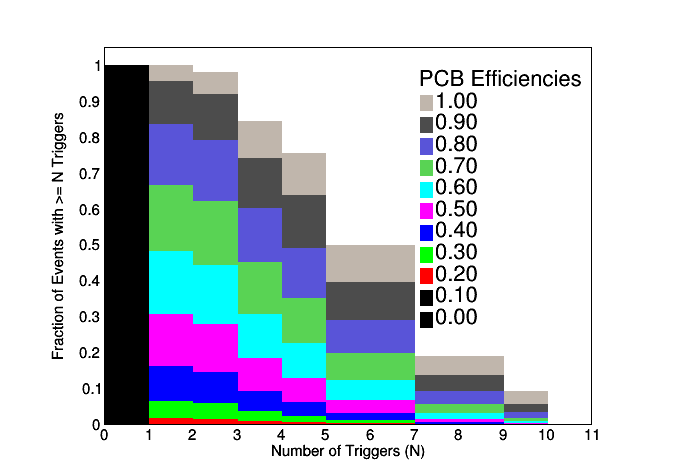

In [317]:
c = {round(i,2):TCanvas("c%.2f"%i,"") for i in effs}
hNTrigsSum = {round(i,2):TH1D("hNTrigsSum%.2f"%i,"",NTRIG, 0 , NTRIG) for i in effs}
efficiencies = {i:[] for i in range(0,11)}
stack = THStack("stack","stack")
l = TLegend(0.6,0.3,0.70,0.85)
l.SetBorderSize(0)

C = c[0.0]
C.cd()
for i,color in zip(np.linspace(1,0,11),np.linspace(1,0,11)*10 + 1):
    i = round(i,2)
    #if i in [0]:continue
    color = int(color) if color != 10 else 12
    H = hNTrigs[i]
    H.Scale(1./H.Integral())
    H.GetXaxis().SetTitle("Number of Triggers")
    H.GetYaxis().SetTitle("Fraction of Events")
    #H.Draw("hist")
    H.SetStats(1)
    H.GetXaxis().CenterTitle()
    H.GetYaxis().CenterTitle()
    
    # Count the number of events with >=N Triggers
    HSum = hNTrigsSum[i]
    for j in range(1,11): 
        HSum.SetBinContent(j, H.Integral(j,11))
        efficiencies[j-1].append(HSum.GetBinContent(j))
    HSum.Draw("hist same")
    HSum.GetXaxis().SetTitle("Number of Triggers (N)")
    HSum.GetXaxis().CenterTitle()
    HSum.GetYaxis().SetTitle("Fraction of Events with >= N Triggers")
    HSum.GetYaxis().CenterTitle()
    HSum.GetYaxis().SetNdivisions(20)
    HSum.GetXaxis().SetNdivisions(11)
    HSum.SetFillColor(color)
    HSum.SetMarkerColor(color)
    HSum.SetLineColor(color)
    HSum.SetStats(0)
    l.AddEntry(HSum,"%.2f"%i,"f")
    stack.Add(HSum)
        
    C.SetLeftMargin(0.15)
    C.SetRightMargin(0.15)    
l.SetHeader("PCB Efficiencies")
l.SetTextSize(0.05)
l.Draw()
C.Draw()
C.SaveAs("FractionOfEventsVsNTriggers_2X2UV.pdf")

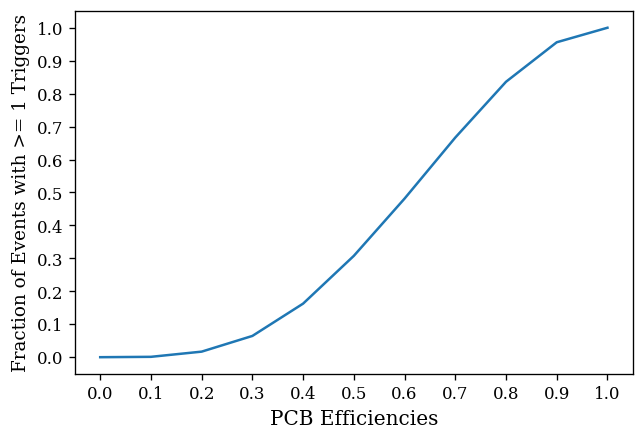

 PCB Efficiencies  Fraction of Events with >= 1 Triggers
              1.0                               1.000000
              0.9                               0.955918
              0.8                               0.836002
              0.7                               0.666709
              0.6                               0.481410
              0.5                               0.307635
              0.4                               0.162637
              0.3                               0.064536
              0.2                               0.016855
              0.1                               0.001110
              0.0                               0.000000


PCB Efficiencies,Fraction of Events with >= 1 Triggers
1.000000,1.000000
0.900000,0.955918
0.800000,0.836002
0.700000,0.666709
0.600000,0.481410
0.500000,0.307635
0.400000,0.162637
0.300000,0.064536
0.200000,0.016855
0.100000,0.001110


In [318]:
x = np.linspace(1,0,11)
plt.plot(x,efficiencies[1])
plt.locator_params(axis='y', nbins=20)
plt.xticks(x)
plt.xlabel('PCB Efficiencies', fontsize=12)
plt.ylabel('Fraction of Events with >= 1 Triggers', fontsize=11)
plt.savefig("NEventsTrig1vsPCBEffs_2X2UV.pdf")
plt.show()

df = pd.DataFrame(zip(np.linspace(1,0,11),efficiencies[1]),columns=["PCB Efficiencies", "Fraction of Events with >= 1 Triggers"])
print(df.to_string(index=False))
df.style.hide_index()

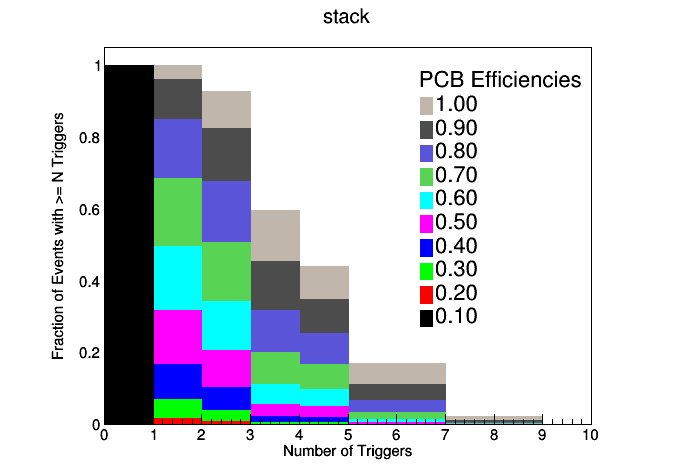

In [228]:
stack.Draw("nostack hist")
stack.GetXaxis().SetTitle("Number of Triggers")
stack.GetXaxis().CenterTitle()
stack.GetYaxis().SetTitle("Fraction of Events with >= N Triggers")
stack.GetYaxis().CenterTitle()
stack.GetYaxis().SetNdivisions(10,0,0)
l.Draw()
C.Update()
C.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: hNTrigsSum (Potential memory leak).


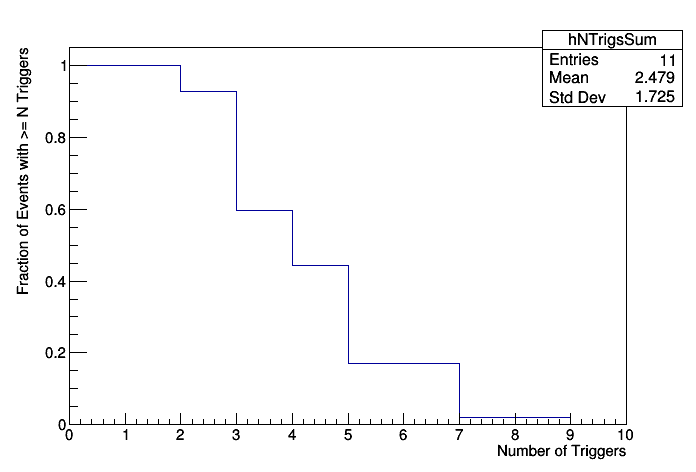

In [11]:
# Count the number of events with >=N Triggers
hNTrigsSum = TH1D("hNTrigsSum","",10, 0 , 10)
for i in range(11): hNTrigsSum.SetBinContent(i, hNTrigs.Integral(i,11))
hNTrigsSum.Draw("hist")
hNTrigsSum.GetXaxis().SetTitle("Number of Triggers")
hNTrigsSum.GetYaxis().SetTitle("Fraction of Events with >= N Triggers")
c.Update()
c.Draw()

In [6]:
NPCB = {i:[] for i in range(9)}
for i,j in zip(z,y):
    #print(i,j)
    NPCB[i].append(j)
nWorking = []
nEvt_mu = []
nEvt_err = []
for key,val in NPCB.items():
    nWorking.append(key)
    nEvt_mu.append(np.mean(val))
    nEvt_err.append(np.std(val)) # These errors should be asymmetric so discount any bars above 10k

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0.0, nan, nan, nan, nan, 9998.0, 8749.5, 9999.979166666666, 9999.998639455782]
[0.0, nan, nan, nan, nan, 0.0, 3307.0002456909497, 0.14282613750835507, 0.03686045492284099]


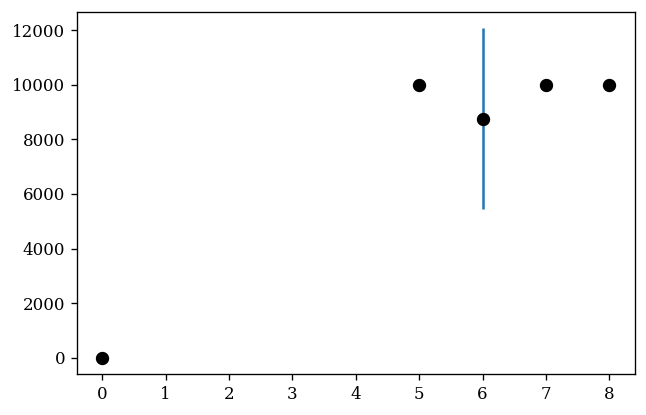

In [7]:
print(nWorking)
print(nEvt_mu)
print(nEvt_err)
plt.errorbar(x=nWorking,y=nEvt_mu,yerr=nEvt_err, marker='o', mfc='black', mec='black', ms=4, mew=4,ls="")
plt.show()

Info in <TCanvas::Print>: pdf file NEventsWTrig0_vs_NWorkingPCB_vs_NRuns.pdf has been created
Info in <TCanvas::Print>: pdf file NEventsWTrig1_vs_NWorkingPCB_vs_NRuns.pdf has been created
Info in <TCanvas::Print>: pdf file NEventsWTrig2_vs_NWorkingPCB_vs_NRuns.pdf has been created
Info in <TCanvas::Print>: pdf file NEventsWTrig3_vs_NWorkingPCB_vs_NRuns.pdf has been created
Info in <TCanvas::Print>: pdf file NEventsWTrig4_vs_NWorkingPCB_vs_NRuns.pdf has been created
Info in <TCanvas::Print>: pdf file NEventsWTrig5_vs_NWorkingPCB_vs_NRuns.pdf has been created
Info in <TCanvas::Print>: pdf file NEventsWTrig6_vs_NWorkingPCB_vs_NRuns.pdf has been created
Info in <TCanvas::Print>: pdf file NEventsWTrig7_vs_NWorkingPCB_vs_NRuns.pdf has been created
Info in <TCanvas::Print>: pdf file NEventsWTrig8_vs_NWorkingPCB_vs_NRuns.pdf has been created
Info in <TCanvas::Print>: pdf file NEventsWTrig9_vs_NWorkingPCB_vs_NRuns.pdf has been created


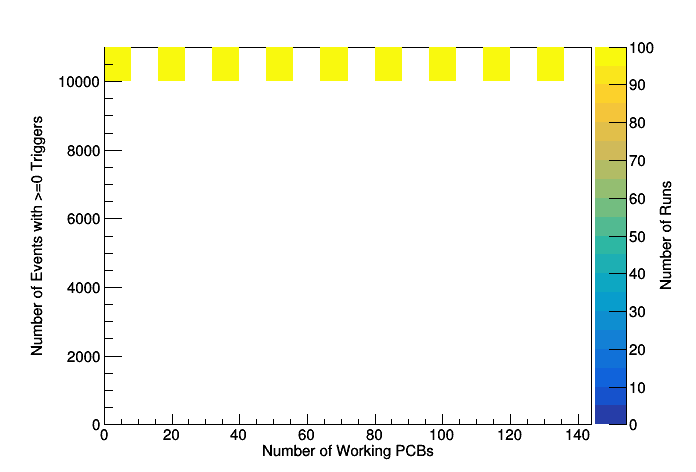

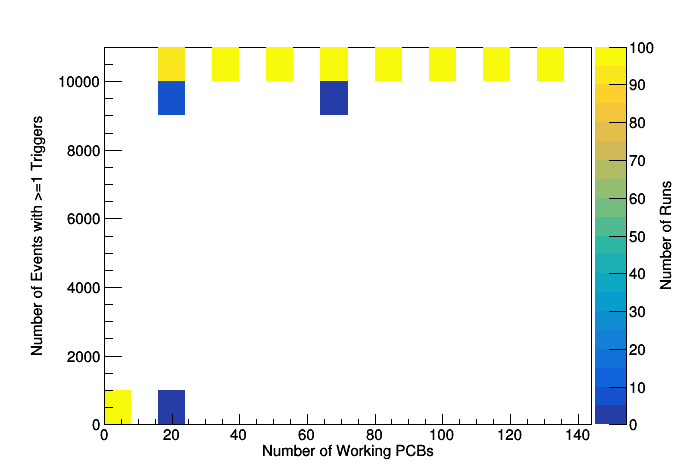

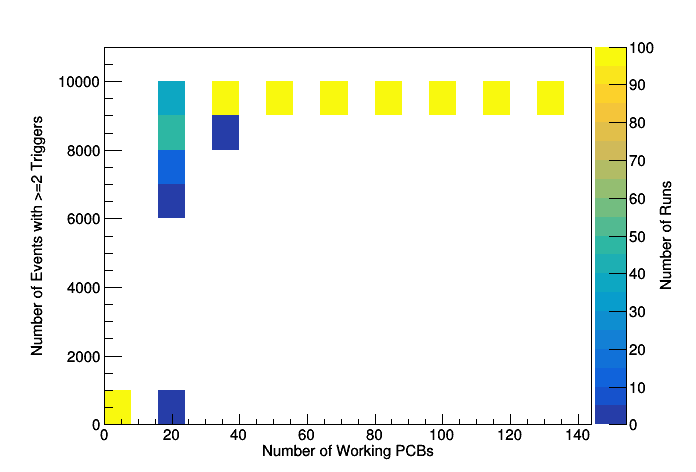

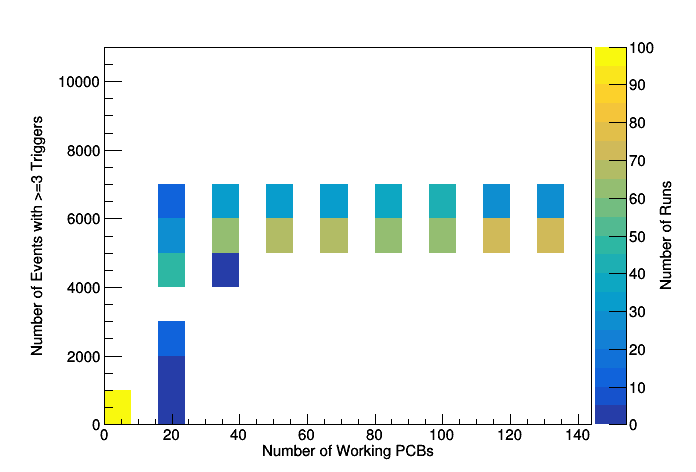

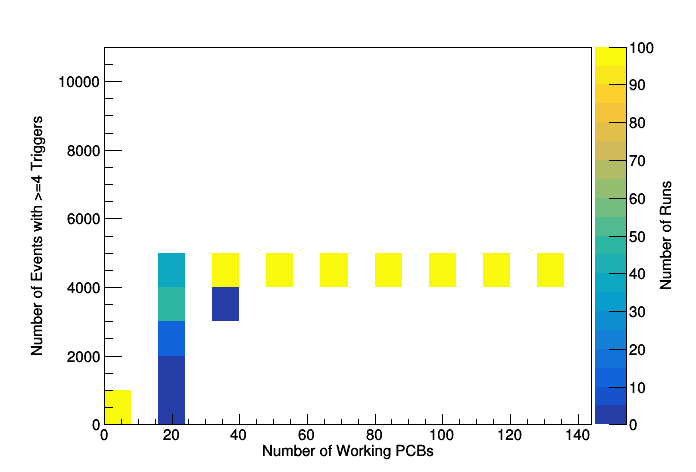

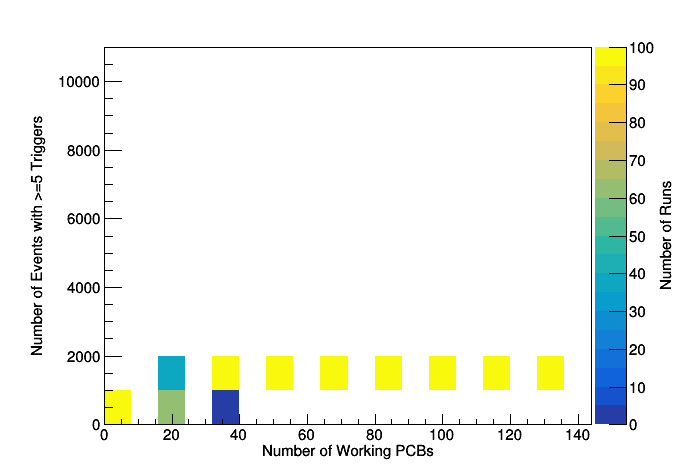

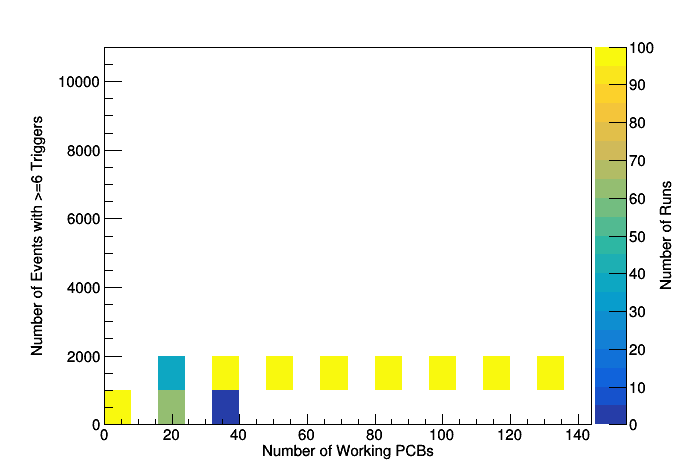

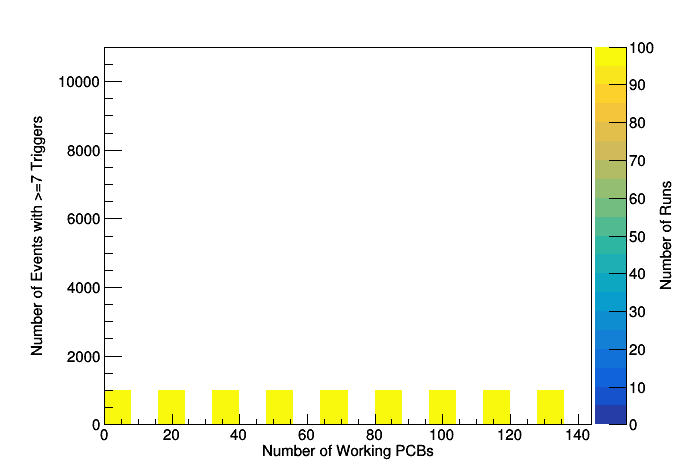

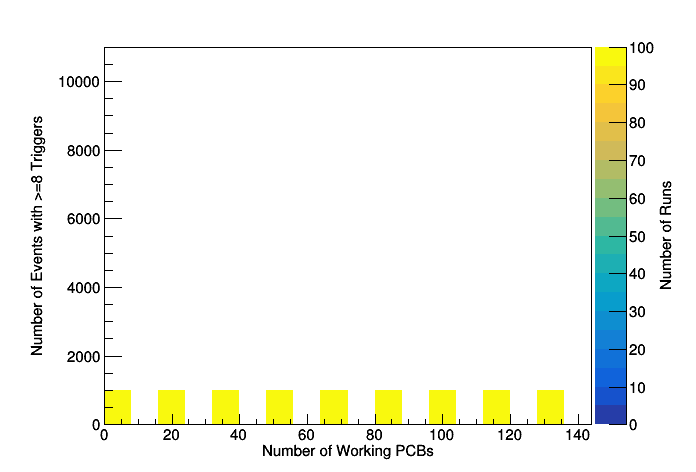

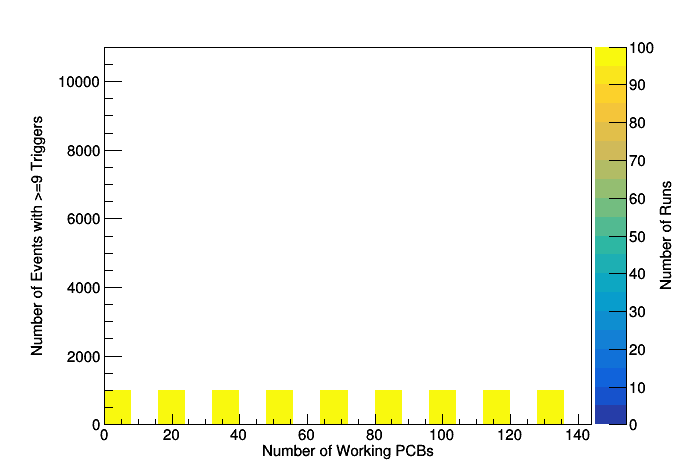

In [8]:
from ROOT import TCanvas
c = [TCanvas("c%i"%i,"") for i in range(len(h))]
for i in range(len(h)):
    C = c[i]
    C.cd()
    H = h[i]
    H.Draw("colz")
    H.SetStats(0)
    H.GetXaxis().SetTitle("Number of Working PCBs")
    H.GetXaxis().CenterTitle()
    H.GetYaxis().SetTitle("Number of Events with >=%i Triggers"%i)
    H.GetYaxis().CenterTitle()
    H.GetZaxis().SetTitle("Number of Runs")
    H.GetZaxis().CenterTitle()
    C.SetLeftMargin(0.15)
    C.SetRightMargin(0.15)
    C.Draw()
    C.SaveAs("NEventsWTrig%i_vs_NWorkingPCB_vs_NRuns.pdf"%i)
    H.Integral()

In [9]:
h1.Draw()
c.Update()
c.Draw()

AttributeError: 'list' object has no attribute 'Update'

## Plot a sample distribution

In [ ]:
'''
# compute the distributions to determine the bin-by-bin corrections
bins = np.linspace(0, 3500, 350)
density = False
#plt.hist(nature['data_thrusts'], bins=bins, histtype='step', color='black', density=density)
real_x_muon_hist = plt.hist(data[0]['real_x_muon'], bins=bins, histtype='step', color='black', density=density, label='Real Muon X')[0]
real_y_muon_hist = plt.hist(data[0]['real_y_muon'], bins=bins, histtype='step', color='blue', density=density, label='Real Muon Y')[0]
#trig_x_hist = plt.hist(trig_x, bins=bins, histtype='step', color='red', density=density)[0]
#trig_y_hist = plt.hist(trig_y, bins=bins, histtype='step', color='green', density=density)[0]

#plt.yscale('log')
plt.legend(loc="upper right")
plt.show()
'''

## Compute the distributions of interest

In [ ]:
# Calculate the number of triggered muons 
# This computation takes a while
xCut = 5
yCut = 5
counter = 0
print('----------------------------------------')
print('Computing the number of triggered muons')
for job in data:
    if counter % 10 == 0: print("Job {}/{}".format(counter,len(data)))
    real_x_muon = job['real_x_muon']
    real_y_muon = job['real_y_muon']
    trig_x = job['trig_x']
    trig_y = job['trig_y']
    TObs = 0
    for i in range(len(real_x_muon)):
        realMuonX = real_x_muon[i]
        realMuonY = real_y_muon[i]
        for j in range(len(trig_x[i])):
            trigX = trig_x[i][j]
            trigY = trig_y[i][j]
            if (abs(realMuonX - trigX) < xCut) and (abs(realMuonY - trigY) < yCut):
                TObs+=1
                break  
    job['TObs'] = TObs
    counter += 1
print('Finished!')
print('----------------------------------------')

In [ ]:
# Compute the group, detector, and trigger efficiencies
# P = product of (1-(1-Ed_{i1})*(1-Ed_{i2})) where i1,i2 are members of each of the four groups 
# group 1 includes the first two x-layers, group 2 includes the u-layers, 
# group 3 includes the v-layers and group 4 includes the final two x-layers.
print('----------------------------------------')
print("Computing the trigger efficiencies")
counter = 0
for job in data:
    if counter % 10 == 0: print("Job {}/{}".format(counter,len(data)))
    mmEffs = job['mmEffs']
    # This probability should not be trusted need to think more about that
    probTrig = [(1-(1-mmEffs[i])*(1-mmEffs[i+1])) for i in range(0,len(mmEffs),2)]
    probTrig = np.array(probTrig).prod()
    
    try:
        # Trigger Efficiency = NTrigs / NEvents
        # Useful to determine how the entire trigger system behaves. 
        trigEff = job['TObs']/(job['nEvent'])
        trigEff_err = (1/job['nEvent'])*(job['TObs'] * (1-job['TObs']/job['nEvent']))**0.5
        # Trigger Efficiency = NTrigs / NExpectedTrigs
        # Useful to compare how factors external to the trigger effect the efficiency. i.e. we expect X triggers 
        # just based on the efficiencies but see Y then maybe other factors such as poor timing resolution could be 
        # in play
        NExp = probTrig*job['nEvent']
        trigEff_GivenMMEffs = job['TObs']/(NExp)
        trigEff_GivenMMEffs_err = (1/NExp)*(job['TObs'] * (1-job['TObs']/NExp))**0.5
    except:
        print("Problem with producing the efficiencies. Setting all to -999.0")
        trigEff = -999.0
        trigEff_err = -999.0
        trigEff_GivenMMEffs = -999.0
        trigEff_GivenMMEffs_err = -999.0
        
    job.update({'probTrig':probTrig,
               'NExp':NExp,
               'trigEff':trigEff,
               'trigEff_err':trigEff_err,
               'trigEff_GivenMMEffs': trigEff_GivenMMEffs,
               'trigEff_GivenMMEffs_err': trigEff_GivenMMEffs_err})
    counter += 1
print("Finished!")
print('----------------------------------------')

In [ ]:
# Dictionary to store the data
hist_data = {'BkgRates':[job['bkgRate'] for job in data],
             'TrigEffs':[job['trigEff'] for job in data],
             'TrigEff_errs':[job['trigEff_err'] for job in data],
             'ProbTrigs':[job['probTrig'] for job in data],
    }

In [ ]:
hist_data_db = pd.DataFrame.from_dict(hist_data)
hist_data_db.head()

In [ ]:
# a dictionary to hold plotting information about the observables
obs = {}
obs.setdefault('TrigEff_BkgRate_ProbTrig',{}).update({
    'xlim': (10**0,10**6), 'ylim': (0,1.0), 'ylim_ratio': (0.7,1.3), 'ytick_ratio_step':0.15,
    'xlabel': 'Background Rate (Hz)', 'ylabel': 'Trigger Efficiency', 'ylabel_ratio':"TEST",
    'legend_loc': 'lower left', 'legend_ncol': 1,
    'x':'BkgRates','y':'TrigEffs','y_err':'TrigEff_errs',
    'scan':'ProbTrigs'
})

histStyle = {'ls': '-', 'marker': 'o', 'ms': 3.5, 'zorder': 1}
legend_opts = {'handlelength': 2.0, 'loc': 'lower left', 'frameon': False, 'numpoints': 1}

## Plot Background Rate vs Trigger Efficiency for Each Trigger Probability

In [ ]:
ob = obs['TrigEff_BkgRate_ProbTrig']

In [ ]:
# Sort the data based on probability of trigger
prob_dict = {}
prob_sig_digs = 20
for i in range(len(hist_data['ProbTrigs'])):
    if round(hist_data['ProbTrigs'][i],prob_sig_digs) not in prob_dict.keys():
        prob_dict[round(hist_data['ProbTrigs'][i],prob_sig_digs) ] = {'BkgRates':[],
                                                'TrigEffs':[],
                                                'TrigEff_errs':[]}
    prob_dict[round(hist_data['ProbTrigs'][i],prob_sig_digs) ]['BkgRates'].append(hist_data['BkgRates'][i])
    prob_dict[round(hist_data['ProbTrigs'][i],prob_sig_digs) ]['TrigEffs'].append(hist_data['TrigEffs'][i])
    prob_dict[round(hist_data['ProbTrigs'][i],prob_sig_digs) ]['TrigEff_errs'].append(hist_data['TrigEff_errs'][i])

for key in prob_dict.keys():
    sorted_data = sorted(zip(prob_dict[key]['BkgRates'], prob_dict[key]['TrigEffs'], prob_dict[key]['TrigEff_errs']))
    prob_dict[key]['BkgRates'] = [i[0] for i in sorted_data]
    prob_dict[key]['TrigEffs'] = [i[1] for i in sorted_data]
    prob_dict[key]['TrigEff_errs'] = [i[2] for i in sorted_data]

In [ ]:
fig, [ax0, ax1] = modplot.axes(**ob)
# additional axis settings
# ax0.set_yscale('log')
ax0.set_xscale('log')
ax0.grid()
ax1.set_xscale('log')

for key in prob_dict.keys():

    # plot the distribution
    ax0.errorbar(prob_dict[key]['BkgRates'],prob_dict[key]['TrigEffs'],yerr=prob_dict[key]['TrigEff_errs'], label='Trigger Probability {}'.format(key), **histStyle)

ax1.plot(ob['xlim'], [1, 1], '--', color='green', lw=0.75)
# legend style and ordering
loc, ncol = ob.get('legend_loc', 'upper right'), ob.get('legend_ncol', 1)
order = range(len(prob_dict.keys()))

# plot the legend
ax0.legend(**legend_opts)

fig.savefig('TrigEff_BkgRate_ProbTrig.pdf', bbox_inches='tight')
plt.show()

## Plot Background Rate vs Trigger Efficiency for Each Killed MM Plane

In [ ]:
plt.rcParams['figure.figsize'] = (50,15)
plt.rcParams['figure.dpi'] = 240
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True

In [ ]:
obs.setdefault('TrigEff_BkgRate_MMKillIndex',{}).update({
    'xlim': (10**0,10**5), 'ylim': (0.5,1.0), 'ylim_ratio': (0.7,1.3), 'ytick_ratio_step':0.15,
    'xlabel': 'Background Rate (Hz)', 'ylabel': 'Trigger Efficiency', 'ylabel_ratio':"TEST",
    'legend_loc': 'lower left', 'legend_ncol': 2,
    'x':'BkgRates','y':'TrigEffs','y_err':'TrigEff_errs',
    'stamp_xy': (0.5, 0.9)
})


ob = obs['TrigEff_BkgRate_MMKillIndex']

In [ ]:
# Sort the data based on index of killed mm
killed_mm = {}
kill_eff = 0.3
for job in data:
    mm_indx = -1
    try:
        mm_indx = job['mmEffs'].index(kill_eff)
    except:
        if job['mmEffs'][0] != 1: continue
        print(job['mmEffs'])
    if mm_indx not in killed_mm.keys():
        killed_mm[mm_indx] = {'BkgRates':[],
                              'TrigEffs':[],
                              'TrigEff_errs':[]}
    killed_mm[mm_indx]['BkgRates'].append(np.array(job['bkgRate']))
    killed_mm[mm_indx]['TrigEffs'].append(np.array(job['trigEff']))
    killed_mm[mm_indx]['TrigEff_errs'].append(np.array(job['trigEff_err']))

In [ ]:
killed_mm_db = pd.DataFrame.from_dict(killed_mm)
killed_mm_db.head()

In [ ]:
fig, [ax0, ax1] = modplot.axes(**ob)
# additional axis settings
# ax0.set_yscale('log')
ax0.set_xscale('log')
ax0.grid()
ax1.set_xscale('log')

for key in killed_mm.keys():
    
    ratio = np.array(killed_mm[key]['TrigEffs'])/np.array(killed_mm[-1]['TrigEffs'])
    ratio_errs = np.array(killed_mm[key]['TrigEff_errs'])/np.array(killed_mm[-1]['TrigEff_errs'])
    
    # plot the distribution
    ax0.errorbar(killed_mm[key]['BkgRates'],killed_mm[key]['TrigEffs'],yerr=killed_mm[key]['TrigEff_errs'], label='Killed MM Plane: {}'.format(key), **histStyle)
    ax1.errorbar(killed_mm[key]['BkgRates'],
                 ratio,
                 yerr=ratio_errs, 
                 label='Killed MM Plane: {}'.format(key), 
                 **histStyle)
ax1.plot(ob['xlim'], [1, 1], '--', color='black', lw=0.75)
# legend style and ordering
loc, ncol = ob.get('legend_loc', 'upper right'), ob.get('legend_ncol', 1)
order = range(len(killed_mm.keys()))

# plot the legend
ax0.legend(**legend_opts)

# stamp to put on the plots
modplot.stamp(*ob['stamp_xy'], delta_y=0.06, ax=ax0,
              line_0=r'\textbf{MM Oct Sim}',
              line_1=r'\textbf{NEvents: %i}'%(data[0]['nEvent'])
             )
    
fig.savefig('TrigEff_BkgRate_MMKillIndex.pdf', bbox_inches='tight')
plt.show()

## Convert to python file

In [ ]:
# Convert notebook into python file
!jupyter nbconvert --to python 'EfficiencyPlots.ipynb'